In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sol = pd.read_csv('D:/converted.csv')
sol.head(10)

,YEAR,MO,DY,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
0,2019,3,1,7.04,6.89
1,2019,3,2,6.53,5.96
2,2019,3,3,6.63,5.98
3,2019,3,4,6.84,6.48
4,2019,3,5,7.12,6.99
5,2019,3,6,7.12,7.04
6,2019,3,7,7.45,7.30
7,2019,3,8,7.26,7.19
8,2019,3,9,6.85,6.37
9,2019,3,10,6.44,5.69


In [3]:
sol['dateInt']=sol['YEAR'].astype(str) + sol['MO'].astype(str).str.zfill(2)+ sol['DY'].astype(str).str.zfill(2)
sol['Date'] = pd.to_datetime(sol['dateInt'], format='%Y%m%d')

sol.drop(columns = ['YEAR', 'MO', 'DY', 'dateInt', 'CLRSKY_SFC_SW_DWN'], inplace=True)
sol = sol.rename(columns = {'ALLSKY_SFC_SW_DWN' : 'GHI'})

In [4]:
sol.head(10)

,GHI,Date
0,6.89,2019-03-01
1,5.96,2019-03-02
2,5.98,2019-03-03
3,6.48,2019-03-04
4,6.99,2019-03-05
5,7.04,2019-03-06
6,7.30,2019-03-07
7,7.19,2019-03-08
8,6.37,2019-03-09
9,5.69,2019-03-10


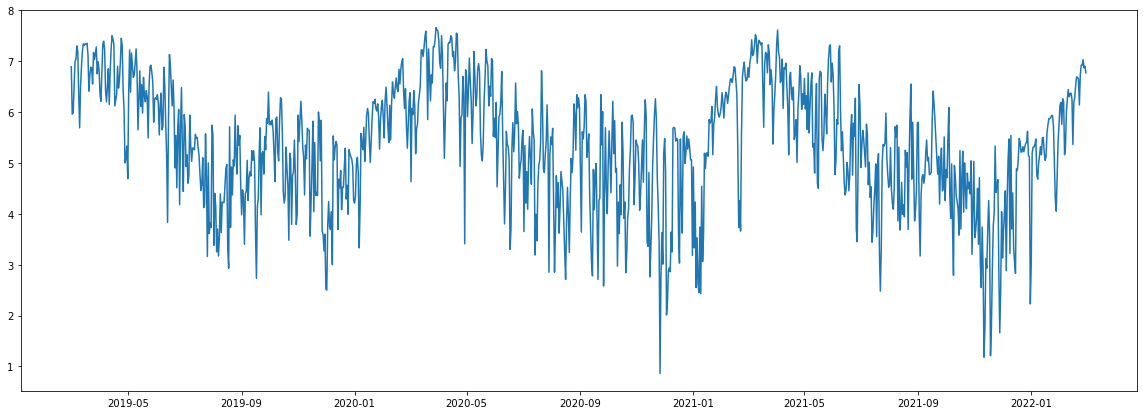

In [6]:
plt.figure(figsize=(20, 7))
plt.plot(sol.Date, sol.GHI)
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def is_stationary(series):
    X = series.values
    result = adfuller(X)
    print('ADF statistic: %f' %result[0])
    print('p value: %f' %result[1]) # result[2] is Number of Lags and result[3] number of observations used
    print('Critical Values:')

    for key, val in result[4].items():
        print('\t%s: %.3f' %(key, val))

    if result[0] < result[4]["5%"]:
        print('Reject H0 - Time series is Stationary')
    else:
        print('Accept H0 - Time series is Non-Stationary')

In [20]:
is_stationary(sol['GHI'])

ADF statistic: -4.001215
p value: 0.001404
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Reject H0 - Time series is Stationary


C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


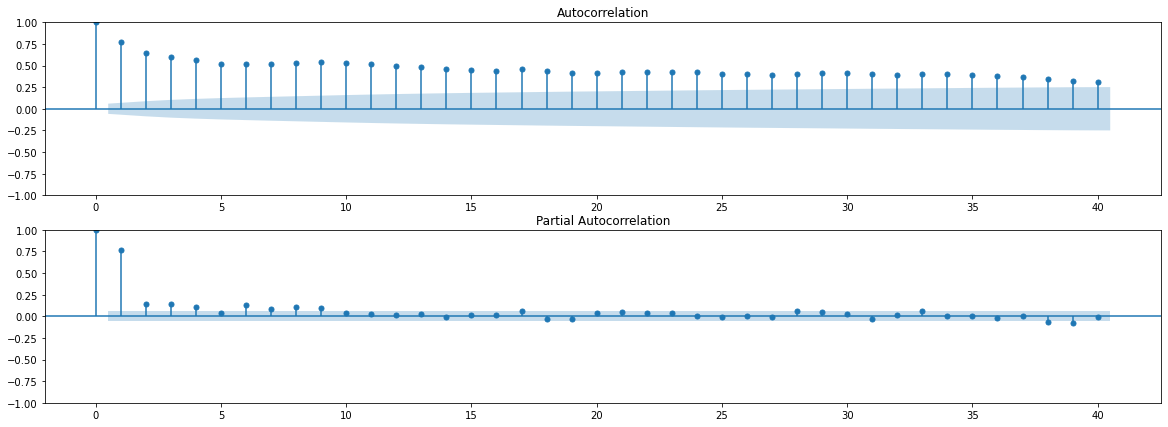

In [21]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sol['GHI'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sol['GHI'], lags=40, ax=ax2)

In [22]:
# This auto_arima is used to find the p, d and q value for ARIMA model.
from pmdarima import auto_arima

stepwise_fit = auto_arima(sol['GHI'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2454.466, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2683.114, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2619.162, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2562.318, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2681.114, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2452.013, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2474.159, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2450.477, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2452.034, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2568.815, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2448.480, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2560.319, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2617.162, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2450.036, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1097
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1221.240
Date:                Fri, 27 May 2022   AIC                           2448.480
Time:                        17:58:50   BIC                           2463.478
Sample:                             0   HQIC                          2454.155
                               - 1097                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4765      0.032     15.075      0.000       0.415       0.539
ma.L1         -0.9085      0.017    -54.457      0.000      -0.941      -0.876
sigma2         0.5433      0.019     29.013      0.000       0.507       0.580
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               135.03
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.64
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# Split the data into training and testing
print('Total data shape: %d' %sol.shape[0])

training_size = int(len(sol)*0.7)
train = sol.iloc[:training_size]
test = sol.iloc[training_size+1:]

print('Train Shape: %d' %train.shape[0])
print('Test Shape: %d' %test.shape[0])

Total data shape: 1097
Train Shape: 767
Test Shape: 329


In [18]:
import matplotlib.dates as mpl_dates
sol.reset_index(inplace=True)
sol['Date']=sol['Date'].apply(mpl_dates.date2num)
sol = sol.astype(float)

In [24]:
def norm(x):
    return ((x - np.mean(train)) / np.std(train))

normed_train = norm(train)
normed_test = norm(test)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error
from skimage.metrics import normalized_root_mse

def model_performance_metrics(pred, actual):
    '''
    Takes the predicted and actual values and return r2_score, rmse, and normalized rmse
    '''
    #r2_score
    r2 = r2_score(actual, pred)  # 1-(SSR/SST) where SST-sum of square of deviation and SSR-sum of square of error
    #root mean squared error
    rmse = np.sqrt(mean_squared_error(actual, pred))
    #normalized root mean squared error
    nrmse = normalized_root_mse(actual, pred)

    print('R2 score: %f' %r2)
    print('RMSE: %f' %rmse)
    print('Normalized RMSE: %f' %nrmse)

    return r2, rmse, nrmse

In [30]:
# for using ARIMA model we need the data to be stationary
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [33]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(normed_train.GHI, order=(1,0,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GHI   No. Observations:                  767
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -739.886
Date:                Fri, 27 May 2022   AIC                           1485.772
Time:                        18:05:33   BIC                           1499.700
Sample:                             0   HQIC                          1491.133
                                - 767                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.121      0.075      0.941      -0.229       0.247
ar.L1          0.7730      0.025     30.729      0.000       0.724       0.822
sigma2         0.4026      0.017     23.103      0.000       0.368       0.437
===================================================================================
Ljung-Box (L1) (Q):                  11.31   Jarque-Bera (JB):               123.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

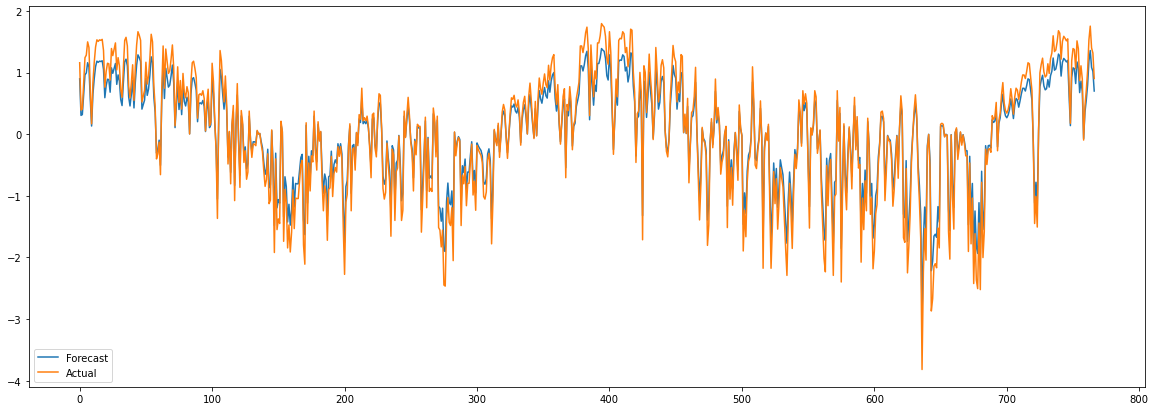

In [35]:
forecast = model.predict(start=1, end=767, dynamic=False)
forecast.index = normed_train.index

plt.figure(figsize=(20, 7))
forecast.plot(legend=True, label='Forecast')
normed_train['GHI'].plot(legend=True, label='Actual')
plt.show()

In [36]:
# performance on training set
model_performance_metrics(forecast, normed_train['GHI'])

R2 score: 0.948476
RMSE: 0.226989
Normalized RMSE: 0.226989


(0.9484762138242476, 0.22698851551510787, 0.22698851551510787)

In [38]:
start = len(normed_train)
end = len(sol)
pred = model.predict(start=start, end=end-2, dynamic=False)
# performance on test set
model_performance_metrics(pred, normed_test['GHI'])

R2 score: -0.119782
RMSE: 1.004920
Normalized RMSE: 0.996661


(-0.11978237879515752, 1.0049201740858456, 0.9966607373552195)

LTSM AFTER THIS

LTSM STARTS HERE

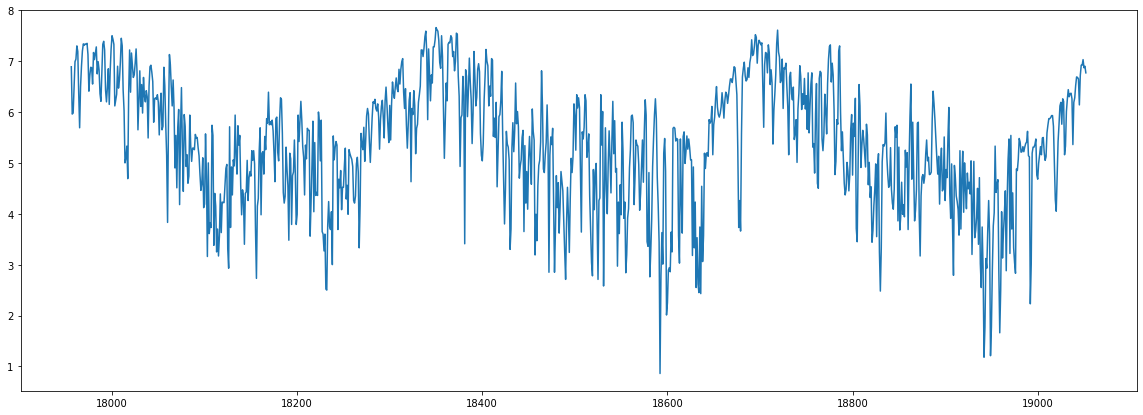

In [40]:
plt.figure(figsize=(20, 7))
plt.plot(sol.Date, sol.GHI)
plt.show()

In [41]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [42]:
sol = sol.values.reshape(-1, 1)
# normalize the dataset
scaler = MinMaxScaler()
sol = scaler.fit_transform(sol)

# split into train and test sets
train_size = int(len(sol) * 0.7)
test_size = len(sol) - train_size
train, test = sol[0:train_size,:], sol[train_size:len(sol),:]
print(len(train), len(test))

2303 988


In [43]:
# convert an array of value into a dataset matrix
def create_dataset(sol, look_back=1):
    dataX, dataY = [], []
    for i in range(len(sol)-look_back-1):
        a = sol[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(sol[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [44]:
# reshape into X=t and Y=t+1
look_back = 48
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [45]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) # input: [time_steps, features]
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
282/282 [==============================] - 7s 6ms/step - loss: 0.0442
Epoch 2/100
282/282 [==============================] - 2s 6ms/step - loss: 5.2352e-05
Epoch 3/100
282/282 [==============================] - 2s 7ms/step - loss: 4.3706e-05
Epoch 4/100
282/282 [==============================] - 2s 7ms/step - loss: 3.7921e-05
Epoch 5/100
282/282 [==============================] - 2s 6ms/step - loss: 2.9391e-05
Epoch 6/100
282/282 [==============================] - 1s 5ms/step - loss: 2.3682e-05
Epoch 7/100
282/282 [==============================] - 2s 6ms/step - loss: 1.6655e-05
Epoch 8/100
282/282 [==============================] - 2s 7ms/step - loss: 1.3059e-05
Epoch 9/100
282/282 [==============================] - 2s 6ms/step - loss: 9.4156e-06
Epoch 10/100
282/282 [==============================] - 2s 7ms/step - loss: 6.1771e-06
Epoch 11/100
282/282 [==============================] - 2s 7ms/step - loss: 5.4106e-06
Epoch 12/100
282/282 [==============================] - 

In [46]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

print('Training score:')
model_performance_metrics(trainY[0], trainPredict[:, 0])
print('\nTest score:')
model_performance_metrics(testY[0], testPredict[:, 0])

Training score:
R2 score: 0.999995
RMSE: 18.425982
Normalized RMSE: 0.001736

Test score:
R2 score: 0.999999
RMSE: 8.507343
Normalized RMSE: 0.000779


(0.9999990416216865, 8.507342675952724, 0.0007789362690657924)

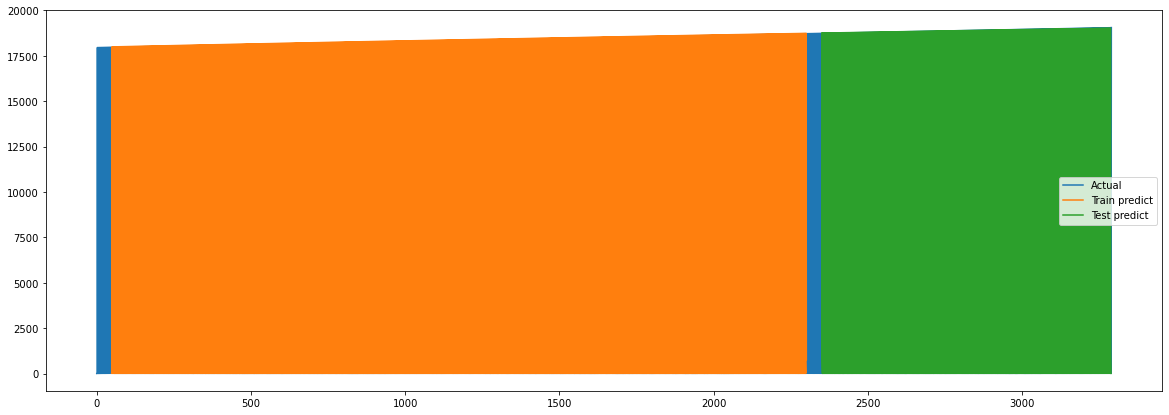

In [47]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(sol)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(sol)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(sol)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20, 7))
plt.plot(scaler.inverse_transform(sol), label='Actual')
plt.plot(trainPredictPlot, label='Train predict')
plt.plot(testPredictPlot, label='Test predict')
plt.legend()
plt.show()